# Web Scraping

In [1]:
#Importing the essential libraries
#Beautiful Soup is a Python library for pulling data out of HTML and XML files
#The Natural Language Toolkit

import requests
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer 
from bs4 import BeautifulSoup
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import random
from wordcloud import WordCloud
from html.parser import HTMLParser

import bs4 as bs
import urllib.request
import re
import string

[nltk_data] Downloading package wordnet to C:\Users\Sayanti
[nltk_data]     Dutta\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
#we are using request package to make a GET request for the website, which means we're getting data from it.
r=requests.get('http://gflenv.com/about-us/')

In [3]:
#Setting the correct text encoding of the HTML page
r.encoding = 'utf-8'

In [4]:
#Extracting the HTML from the request object
html = r.text

In [5]:
# Printing the first 500 characters in html
print(html[:500])

<!DOCTYPE html>
<html lang="en-US" prefix="og: http://ogp.me/ns#" class="no-js">
<head>
	
<!-- Google Tag Manager -->
<script>(function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
'https://www.googletagmanager.com/gtm.js?id='+i+dl;f.parentNode.insertBefore(j,f);
})(window,document,'script','dataLayer','GTM-5C34RXR');</script>
<!-- End Google Tag Man


In [6]:
# Creating a BeautifulSoup object from the HTML
soup = BeautifulSoup(html)

In [7]:
# Getting the text out of the soup
text = soup.get_text()

In [8]:
#total length
len(text)

12522

In [9]:
text=text[5000:10000]

In [10]:
text_nopunct=''

text_nopunct= "".join([char for char in text if char not in string.punctuation])

In [11]:
len(text_nopunct)

4605

In [12]:
text_nopunct[2375:3980]

'GFL\xa0Environmental Inc is a leading North American provider of diversified environmental solutions Recognized by our signature fleet of wellmaintained bright green trucks we offer a robust consolidated and sophisticated approach to meeting our customers’ environmental service requirements\nGFL is the only major diversified environmental services company in North America offering services in solid waste management liquid waste management and infrastructure development\nOur services include\n\nCollection hauling sorting transfer and disposal of nonhazardous solid waste including recyclable materials and organics\nIdentification collection transport processing recycling and disposal of a broad range of hazardous and nonhazardous liquid wastes plus sale of recycled liquid wastes and other liquid products and\nInfrastructure services including site excavation demolition shoring and foundations civil projects soil retention and remediation and more\n\nThrough GFL’s strategically located n

In [13]:
text_nopunct=text_nopunct.strip('\n')
text_nopunct=text_nopunct.strip('\n\n')
text_nopunct=text_nopunct.strip('\n\n\n')

In [14]:
text_nopunct[2375:3980]

'GFL\xa0Environmental Inc is a leading North American provider of diversified environmental solutions Recognized by our signature fleet of wellmaintained bright green trucks we offer a robust consolidated and sophisticated approach to meeting our customers’ environmental service requirements\nGFL is the only major diversified environmental services company in North America offering services in solid waste management liquid waste management and infrastructure development\nOur services include\n\nCollection hauling sorting transfer and disposal of nonhazardous solid waste including recyclable materials and organics\nIdentification collection transport processing recycling and disposal of a broad range of hazardous and nonhazardous liquid wastes plus sale of recycled liquid wastes and other liquid products and\nInfrastructure services including site excavation demolition shoring and foundations civil projects soil retention and remediation and more\n\nThrough GFL’s strategically located n

In [15]:
#Creating the tokenizer
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')

In [16]:
#Tokenizing the text
tokens = tokenizer.tokenize(text_nopunct)

In [17]:
len(tokens)

556

In [18]:
print(tokens[242:262])

['GFL', 'Environmental', 'Inc', 'is', 'a', 'leading', 'North', 'American', 'provider', 'of', 'diversified', 'environmental', 'solutions', 'Recognized', 'by', 'our', 'signature', 'fleet', 'of', 'wellmaintained']


In [19]:
#now we shall make everything lowercase for uniformity
#to hold the new lower case words

words = []

# Looping through the tokens and make them lower case
for word in tokens:
    words.append(word.lower())

In [20]:
print(words[242:304])

['gfl', 'environmental', 'inc', 'is', 'a', 'leading', 'north', 'american', 'provider', 'of', 'diversified', 'environmental', 'solutions', 'recognized', 'by', 'our', 'signature', 'fleet', 'of', 'wellmaintained', 'bright', 'green', 'trucks', 'we', 'offer', 'a', 'robust', 'consolidated', 'and', 'sophisticated', 'approach', 'to', 'meeting', 'our', 'customers', 'environmental', 'service', 'requirements', 'gfl', 'is', 'the', 'only', 'major', 'diversified', 'environmental', 'services', 'company', 'in', 'north', 'america', 'offering', 'services', 'in', 'solid', 'waste', 'management', 'liquid', 'waste', 'management', 'and', 'infrastructure', 'development']


In [21]:
#Stop words are generally the most common words in a language.
#English stop words from nltk.

stopwords = nltk.corpus.stopwords.words('english')

In [22]:
words_new = []

#Now we need to remove the stop words from the words variable
#Appending to words_new all words that are in words but not in sw

for word in words:
    if word not in stopwords:
        words_new.append(word)

In [23]:
len(words_new)

416

# Lemmatization
Lemmatization is the algorithmic process of finding the lemma of a word depending on their meaning. Lemmatization usually refers to the morphological analysis of words, which aims to remove inflectional endings.

In [24]:
from nltk.stem import WordNetLemmatizer 
wn = WordNetLemmatizer()

In [25]:
lem_words=[]

for word in words_new:
    word=wn.lemmatize(word)
    lem_words.append(word)

In [26]:
len(lem_words)

416

In [27]:
same=0
diff=0

for i in range(0,416):
    if(lem_words[i]==words_new[i]):
        same=same+1
    elif(lem_words[i]!=words_new[i]):
        diff=diff+1

In [28]:
print('Number of words Lemmatized=', diff)
print('Number of words not Lemmatized=', same)

Number of words Lemmatized= 54
Number of words not Lemmatized= 362


In [29]:
#The frequency distribution of the words
freq_dist = nltk.FreqDist(lem_words)

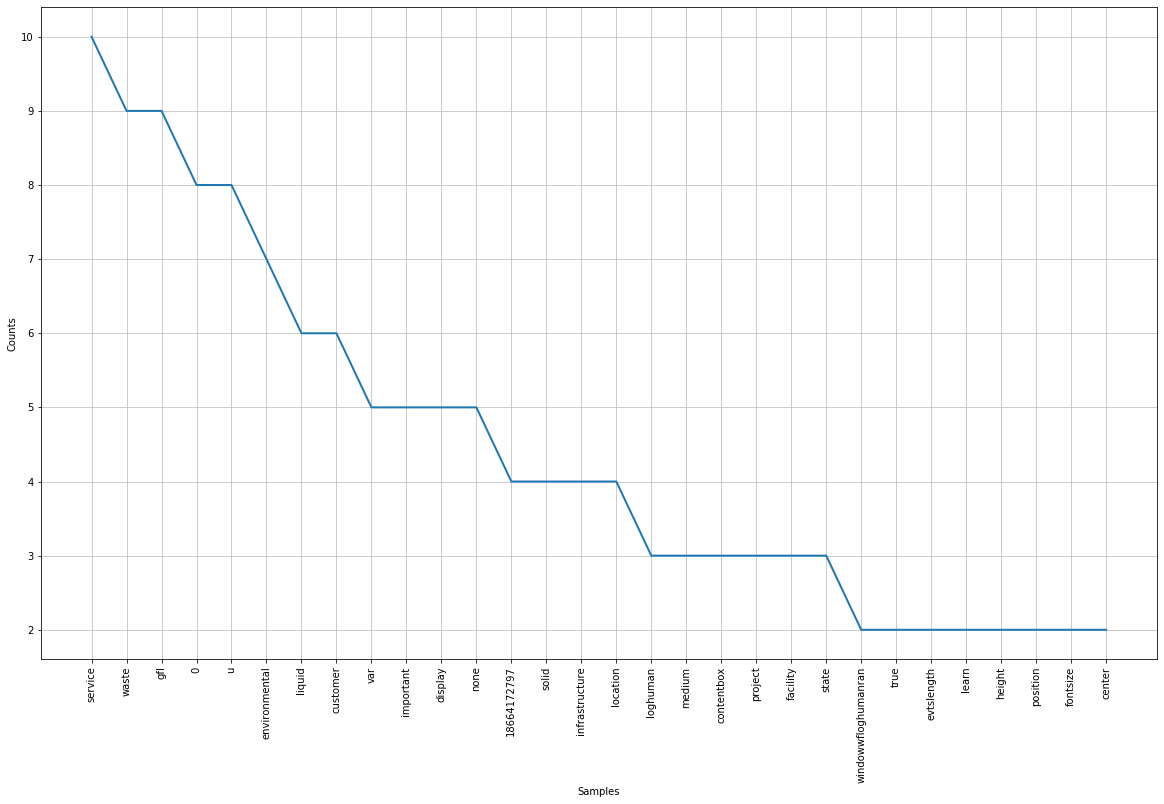

In [30]:
#Frequency Distribution Plot
plt.subplots(figsize=(20,12))
freq_dist.plot(30)

In [31]:
#converting into string
res=' '.join([i for i in lem_words if not i.isdigit()])

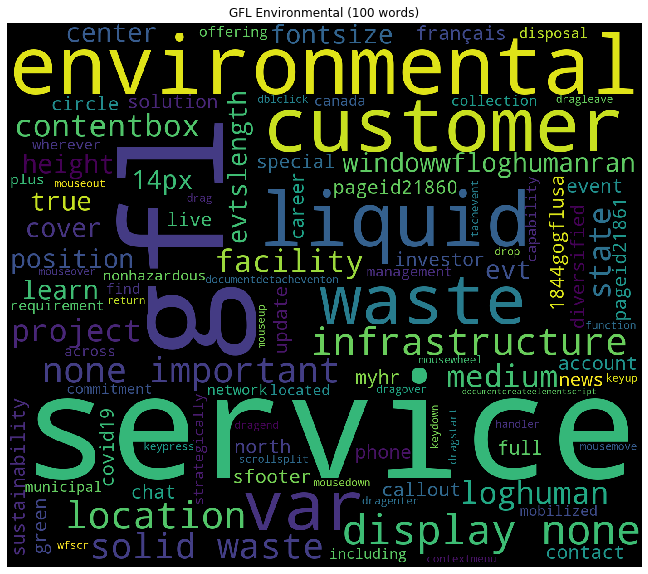

In [32]:
plt.subplots(figsize=(16,10))
wordcloud = WordCloud(
                          background_color='black',
                          max_words=100,
                          width=1400,
                          height=1200
                         ).generate(res)


plt.imshow(wordcloud)
plt.title('GFL Environmental (100 words)')
plt.axis('off')
plt.show()

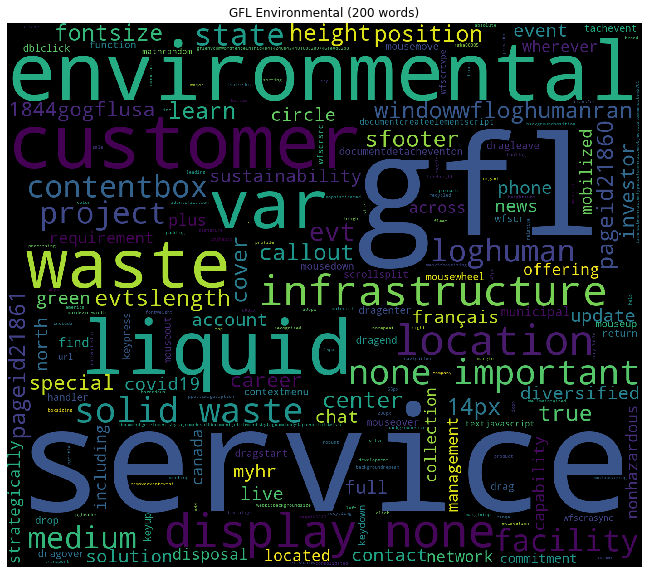

In [33]:
plt.subplots(figsize=(16,10))
wordcloud = WordCloud(
                          background_color='black',
                          max_words=200,
                          width=1400,
                          height=1200
                         ).generate(res)


plt.imshow(wordcloud)
plt.title('GFL Environmental (200 words)')
plt.axis('off')
plt.show()

# Inferences from Word Cloud
Words finding large sizes are- GFL,Environmental,service,waste which is kind of obvious as that is the company offers services in solid waste management, liquid waste management and infrastructure development.

They offer a robust, consolidated and sophisticated approach to meeting our customers’ environmental service requirements.

All the words in the Word Cloud are such which have high mentions in the article.

These are the key areas in which the company focuses.